<a href="https://colab.research.google.com/github/krakowiakpawel9/convnet-course/blob/master/02_simple_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255.

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255.

from keras.models import Sequential
from keras.layers import Dense

neural_network = Sequential()
neural_network.add(Dense(units=512, activation='relu', input_shape=(28*28, )))
neural_network.add(Dense(units=10, activation='softmax'))
neural_network.compile(optimizer='rmsprop',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

history = neural_network.fit(train_images, train_labels, epochs=15, batch_size=128, validation_data=(test_images, test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.2594 - acc: 0.9243 - val_loss: 0.1359 - val_acc: 0.9570
Epoch 2/15
60000/60000 [==============================] - 5s 90us/step - loss: 0.1046 - acc: 0.9686 - val_loss: 0.0913 - val_acc: 0.9729
Epoch 3/15
60000/60000 [==============================] - 5s 91us/step - loss: 0.0686 - acc: 0.9790 - val_loss: 0.0797 - val_acc: 0.9769
Epoch 4/15
60000/60000 [==============================] - 5s 91us/step - loss: 0.0502 - acc: 0.9847 - val_loss: 0.0690 - val_acc: 0.9780
Epoch 5/15
60000/60000 [==============================] - 6s 92us/step - loss: 0.0379 - acc: 0.9887 - val_loss: 0.0668 - val_acc: 0.9795
Epoch 6/15
60000/60000 [==============================] - 5s 90us/step - loss: 0.0285 - acc: 0.9915 - val_loss: 0.0692 - val_acc: 0.9784
Epoch 7/15
60000/60000 [==============================] - 6s 92us/step - loss: 0.0219 - acc: 0.9935 - val_loss: 0.0629 - val_acc

In [11]:
neural_network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 53us/step


[0.07763952689403963, 0.9828]

In [0]:
def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['acc'], history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()
    
def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()

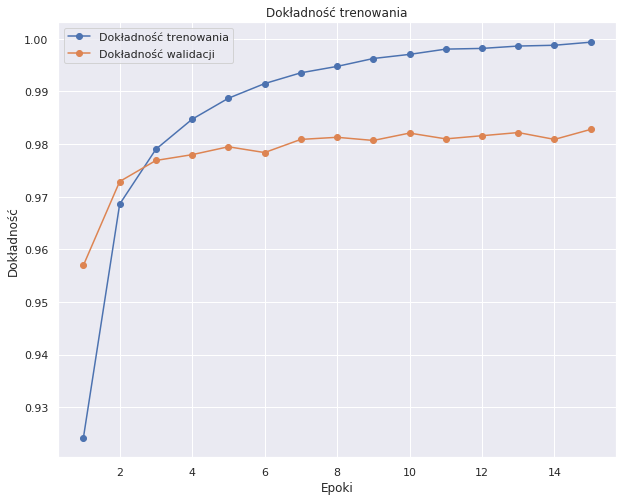

In [15]:
make_accuracy_plot(history)

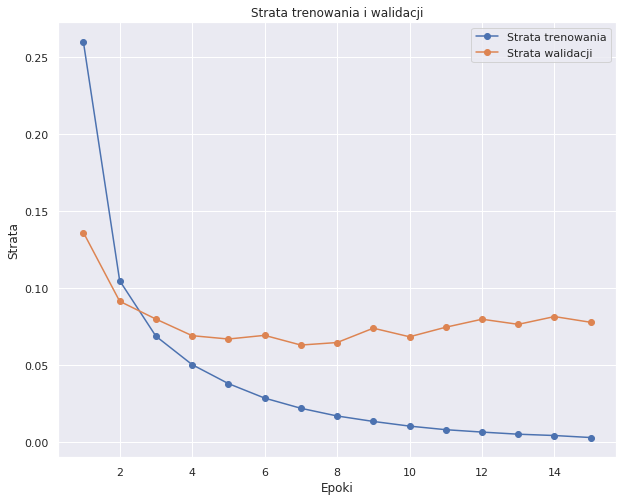

In [18]:
make_loss_plot(history)